In [270]:
import pandas as pd

# Load the data from the uploaded file
file_path = 'digital_currency.csv'
data = pd.read_csv(file_path)

data['date'] = pd.to_datetime(data['date'], format='ISO8601')
data.set_index('date', inplace=True)

# Display the first few rows of the dataframe to understand its structure
data.head()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
date,,,,,,,,,
2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


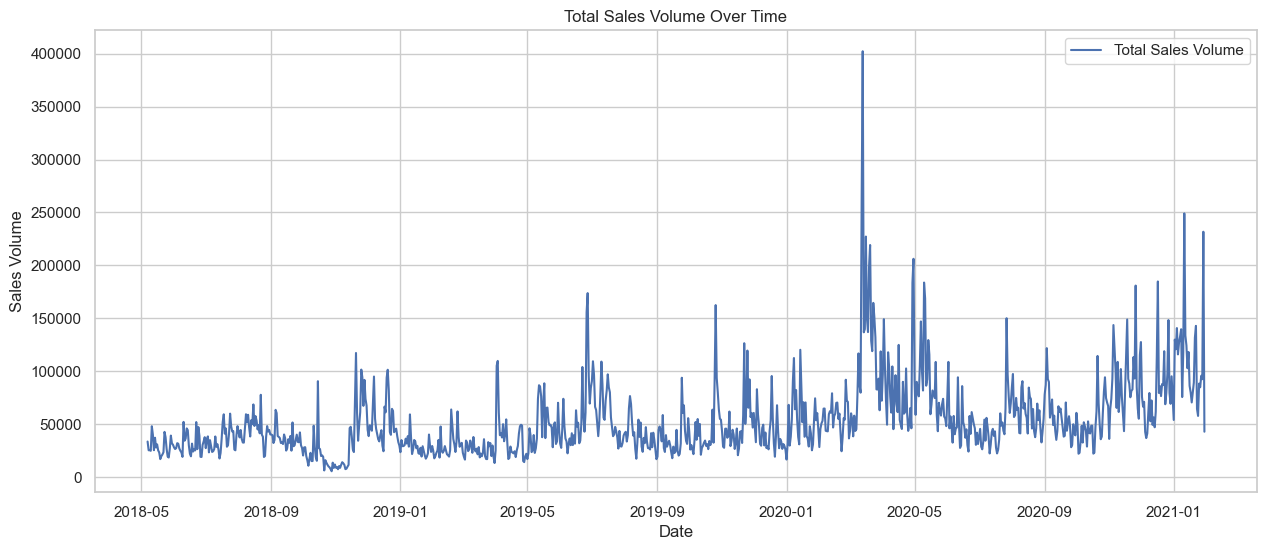

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the seaborn style for better visualization
sns.set(style="whitegrid")

# 1. Total Sales Volume
plt.figure(figsize=(15, 6))
plt.plot(data['volume'], label='Total Sales Volume')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.title('Total Sales Volume Over Time')
plt.legend()
plt.show()

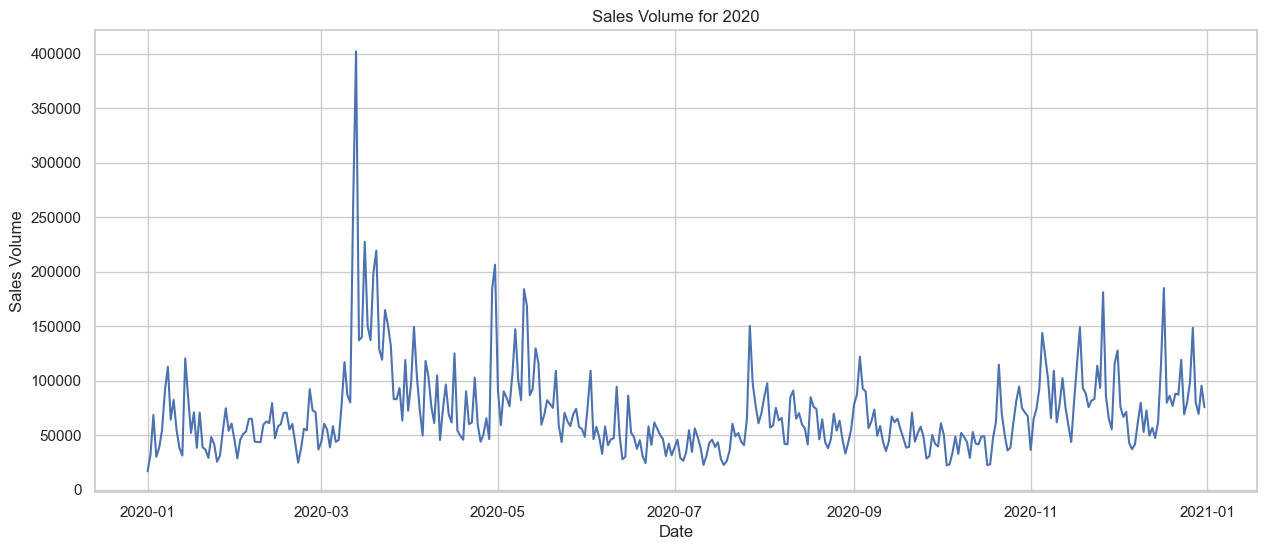

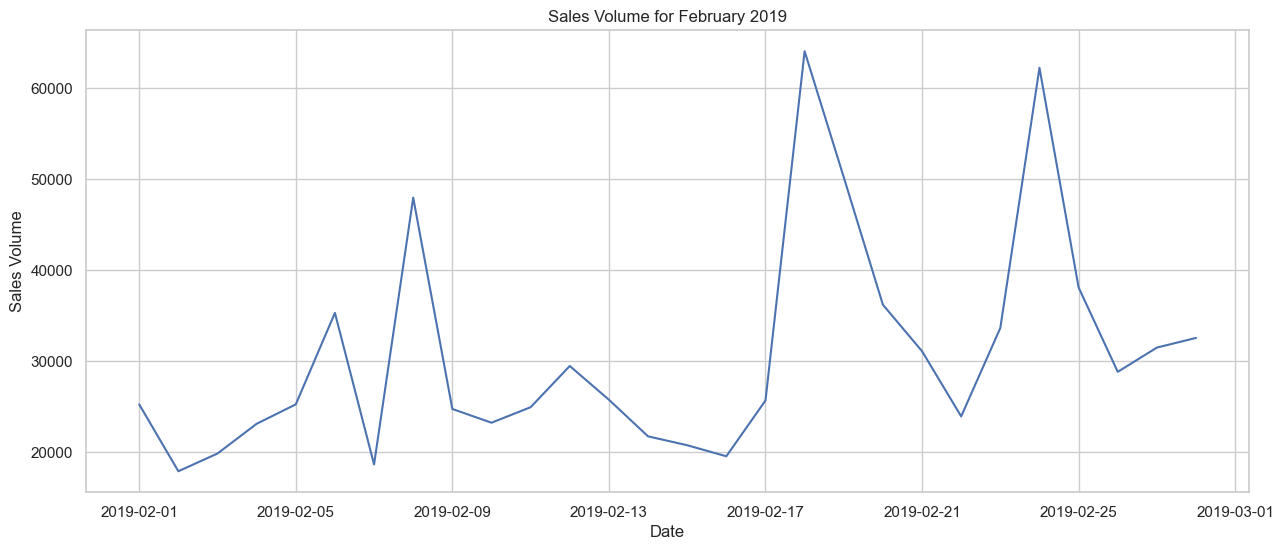

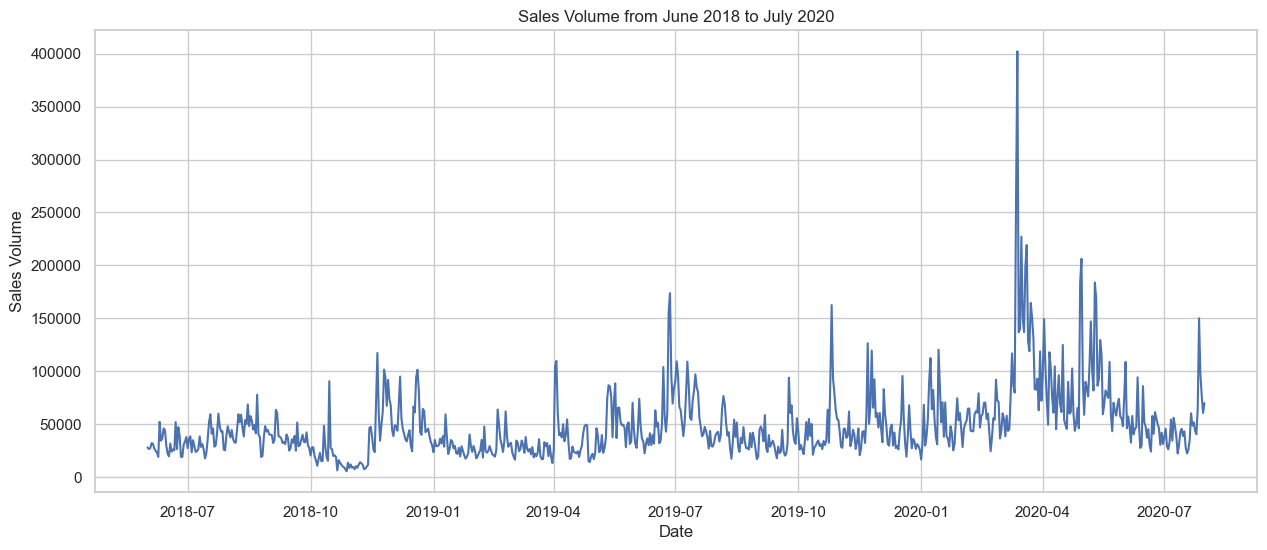

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
date,,,,,,,,,
2020-12-31,108294.862720,28875.55,109886.7200,29300.0,104448.6400,27850.0,108475.181952,28923.63,75508
2020-12-30,102704.704000,27385.00,108746.5984,28996.0,102460.9280,27320.0,108294.825216,28875.54,95356
2020-12-29,101558.656768,27079.42,102798.4640,27410.0,97060.3520,25880.0,102704.704000,27385.00,69411
2020-12-28,98566.287616,26281.54,103136.0000,27500.0,97889.1904,26101.0,101558.619264,27079.41,79721
2020-12-27,99360.847360,26493.40,106593.8688,28422.0,96385.2800,25700.0,98566.737664,26281.66,148455


In [272]:
period_2020 = data.loc['2020']
period_2019_02 = data.loc['2019-02']
#Sort the data in ascending order of date in order to make it monotonic
data_sorted = data.sort_index(ascending=True)
period_2018_06_2020_07 = data_sorted.loc['2018-06':'2020-07']

# Helper function to plot sales volume for specific periods
def plot_sales_volume(data_in, title='Sales Volume'):
    plt.figure(figsize=(15, 6))
    plt.plot(data_in['volume'], label=title)
    plt.xlabel('Date')
    plt.ylabel('Sales Volume')
    plt.title(title)
    plt.show()

# 2. Sales Volume for 2020
plot_sales_volume(period_2020, 'Sales Volume for 2020')

# 3. Sales Volume for February 2019
plot_sales_volume(period_2019_02, 'Sales Volume for February 2019')

# 4. Sales Volume from June 2018 to July 2020
plot_sales_volume(period_2018_06_2020_07, 'Sales Volume from June 2018 to July 2020')

period_2020.head()


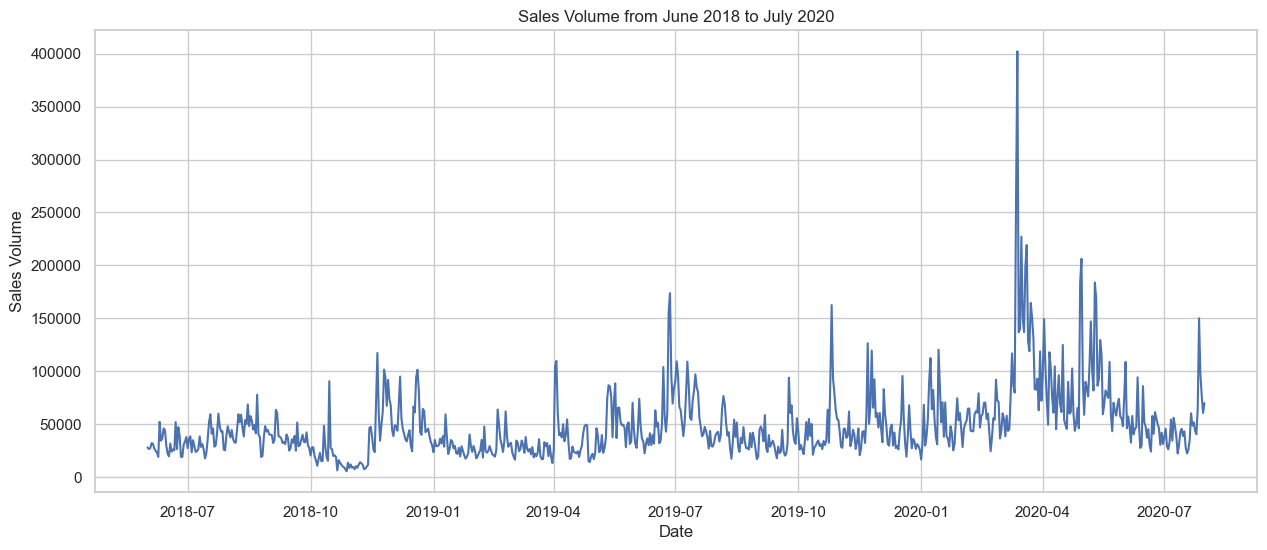

In [273]:
data_jun2018_jul2020 = data_sorted.loc['2018-06':'2020-07']

plot_sales_volume(data_jun2018_jul2020, 'Sales Volume from June 2018 to July 2020')

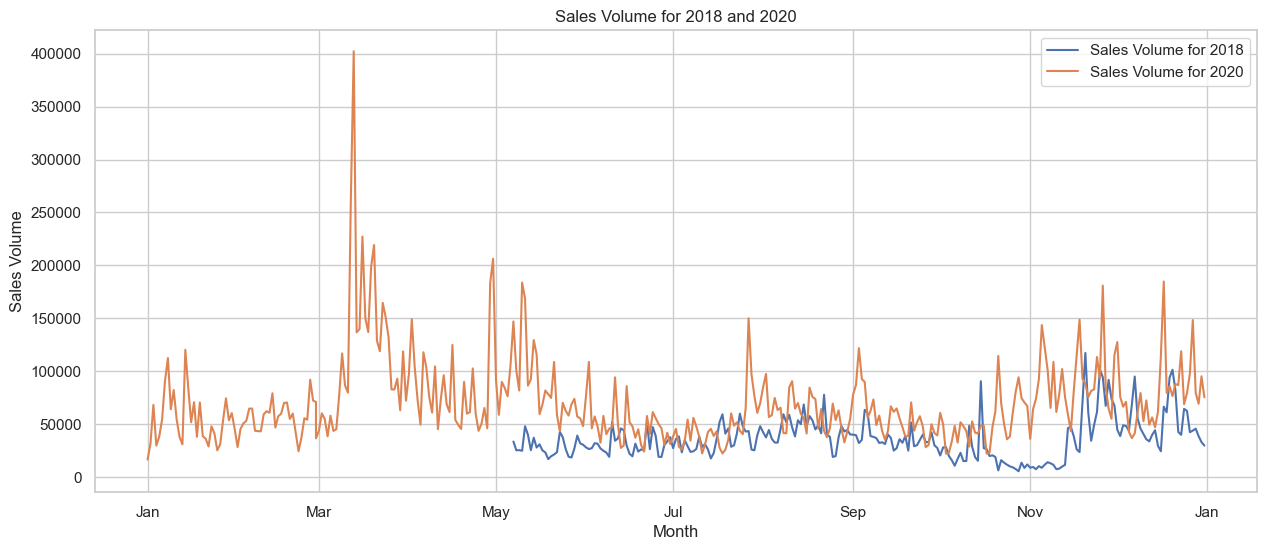

In [274]:
import matplotlib.dates as md

period_2018 = data.loc['2018']

period_2020_s = period_2020.index - pd.DateOffset(years=2)


plt.figure(figsize=(15, 6))
plt.gca().xaxis.set_major_formatter(md.DateFormatter('%b'))
plt.plot(period_2018.index, period_2018['volume'], label='Sales Volume for 2018')
plt.plot(period_2020_s, period_2020['volume'], label='Sales Volume for 2020')
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.title('Sales Volume for 2018 and 2020')
plt.legend()
plt.show()


In [275]:
# Calculate the average closing price in USD for the year 2020
average_close_2020 = period_2020['close_USD'].mean()

average_close_2020

11110.54849726776

In [276]:
# For monthly average closing price
monthly_avg_close = data['close_USD'].resample('M').mean().reset_index()

monthly_avg_close.head(50)

,date,close_USD
0,2018-05-31,8155.760400
1,2018-06-30,6767.169333
2,2018-07-31,7124.244839
3,2018-08-31,6675.768387
4,2018-09-30,6593.360667
5,2018-10-31,6537.378065
6,2018-11-30,5462.571667
7,2018-12-31,3670.323548
8,2019-01-31,3643.328387
9,2019-02-28,3690.157500


In [277]:
# For bi-weekly average closing price in spring and summer of 2019
spring_summer_2019 = data_sorted.loc['2019-03':'2019-08']

# Resample to get bi-weekly average closing price in USD for spring and summer of 2019
biweekly_avg_close_2019 = spring_summer_2019.resample('2W')['close_USD'].mean().reset_index()

biweekly_avg_close_2019

,date,close_USD
0,2019-03-03,3816.893333
1,2019-03-17,3888.685714
2,2019-03-31,4019.774286
3,2019-04-14,4999.233571
4,2019-04-28,5276.367143
5,2019-05-12,5930.017143
6,2019-05-26,7890.256429
7,2019-06-09,8220.040000
8,2019-06-23,9113.529286
9,2019-07-07,11474.715000


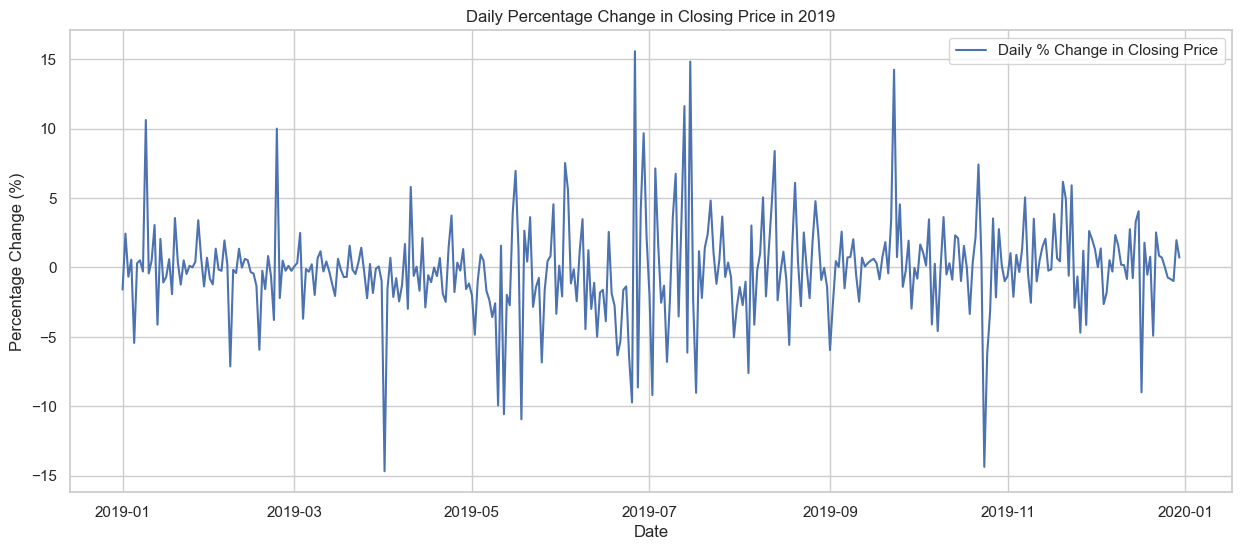

In [278]:
# Filter data for 2019 and calculate daily percentage change in closing price
period_2019 = data.loc['2019']
daily_pct_change = period_2019['close_USD'].pct_change() * 100

# Plot the daily percentage change for 2019
plt.figure(figsize=(15, 6))
plt.plot(period_2019.index, daily_pct_change, label='Daily % Change in Closing Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.title('Daily Percentage Change in Closing Price in 2019')
plt.legend()
plt.show()

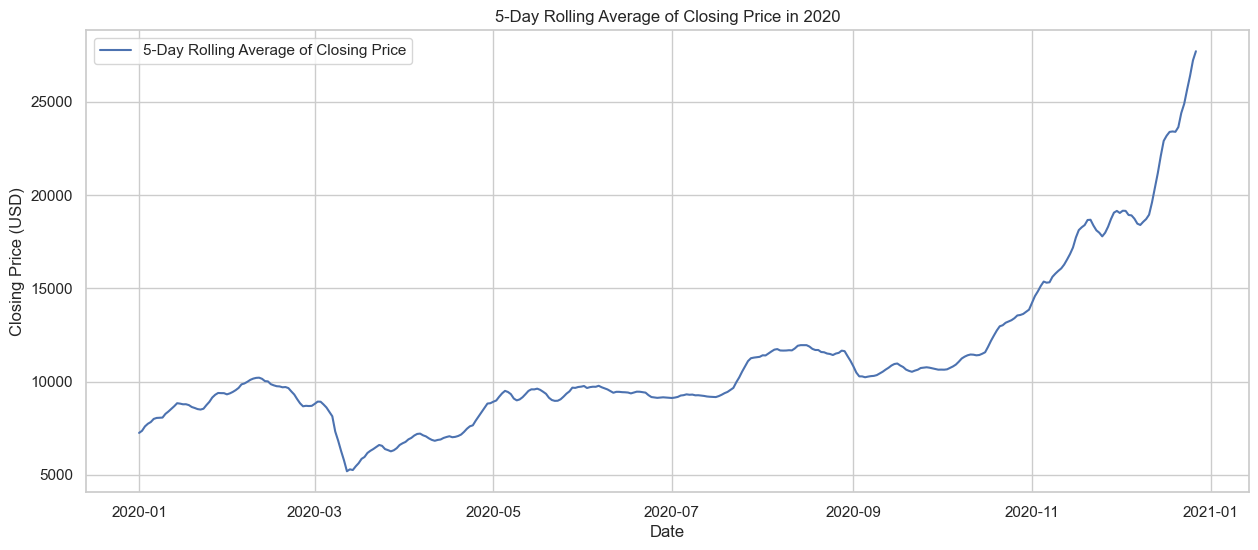

In [279]:
# Calculate the 5-day rolling average of the closing price for 2020
rolling_avg_close = period_2020['close_USD'].rolling(window=5).mean()

# Plot the 5-day rolling average for 2020
plt.figure(figsize=(15, 6))
plt.plot(period_2020.index, rolling_avg_close, label='5-Day Rolling Average of Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('5-Day Rolling Average of Closing Price in 2020')
plt.legend()
plt.show()